In [3]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
import pickle

pathToPickle = r"C:\Users\anton\OneDriveNy\OneDrive - Danmarks Tekniske Universitet\Skole\7. Semester\Social Graphs\GOT_social_graph\scripts\GOTNetwork.pkl"
file = open(pathToPickle, "rb")
G = pickle.load(file)

In [42]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=0.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.002,
                        strongGravityMode=False,
                        gravity=10.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2)


100%|██████████| 2/2 [00:00<00:00, 333.78it/s]

BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


In [5]:
DegreeList = []
labels = {}
HOUSELIST = list()

for (Character, attributes) in G.nodes(data=True):
#    if attributes["coast"] == "West":
#        ColourList.append("red")
#    else:
#        ColourList.append("blue")
    if len(attributes) > 0:
        for House in attributes["affiliation"]:
            if House not in HOUSELIST:
                HOUSELIST.append(House)
    if G.degree()[Character] > 230:
        labels[Character] = Character
        print(Character,G.degree()[Character])
    
    DegreeList.append(G.degree()[Character])


    

sam 258
bronn 328
sandor clegane 250
petyr baelish 316
varys 292
catelyn stark 248
pycelle 248
samwell tarly 236
davos seaworth 234
robb stark 246
cersei lannister 382
tyrion lannister 426
bran stark 280
daenerys targaryen 412
jaime lannister 372
joffrey baratheon 238
jon snow 394
jorah mormont 362
sansa stark 382
arya stark 398
theon greyjoy 334


In [13]:
edgeweights = list()
for (FROM, TO, attributes) in G.edges(data=True):
    edgeweights.append(len(attributes["lines"])/150)

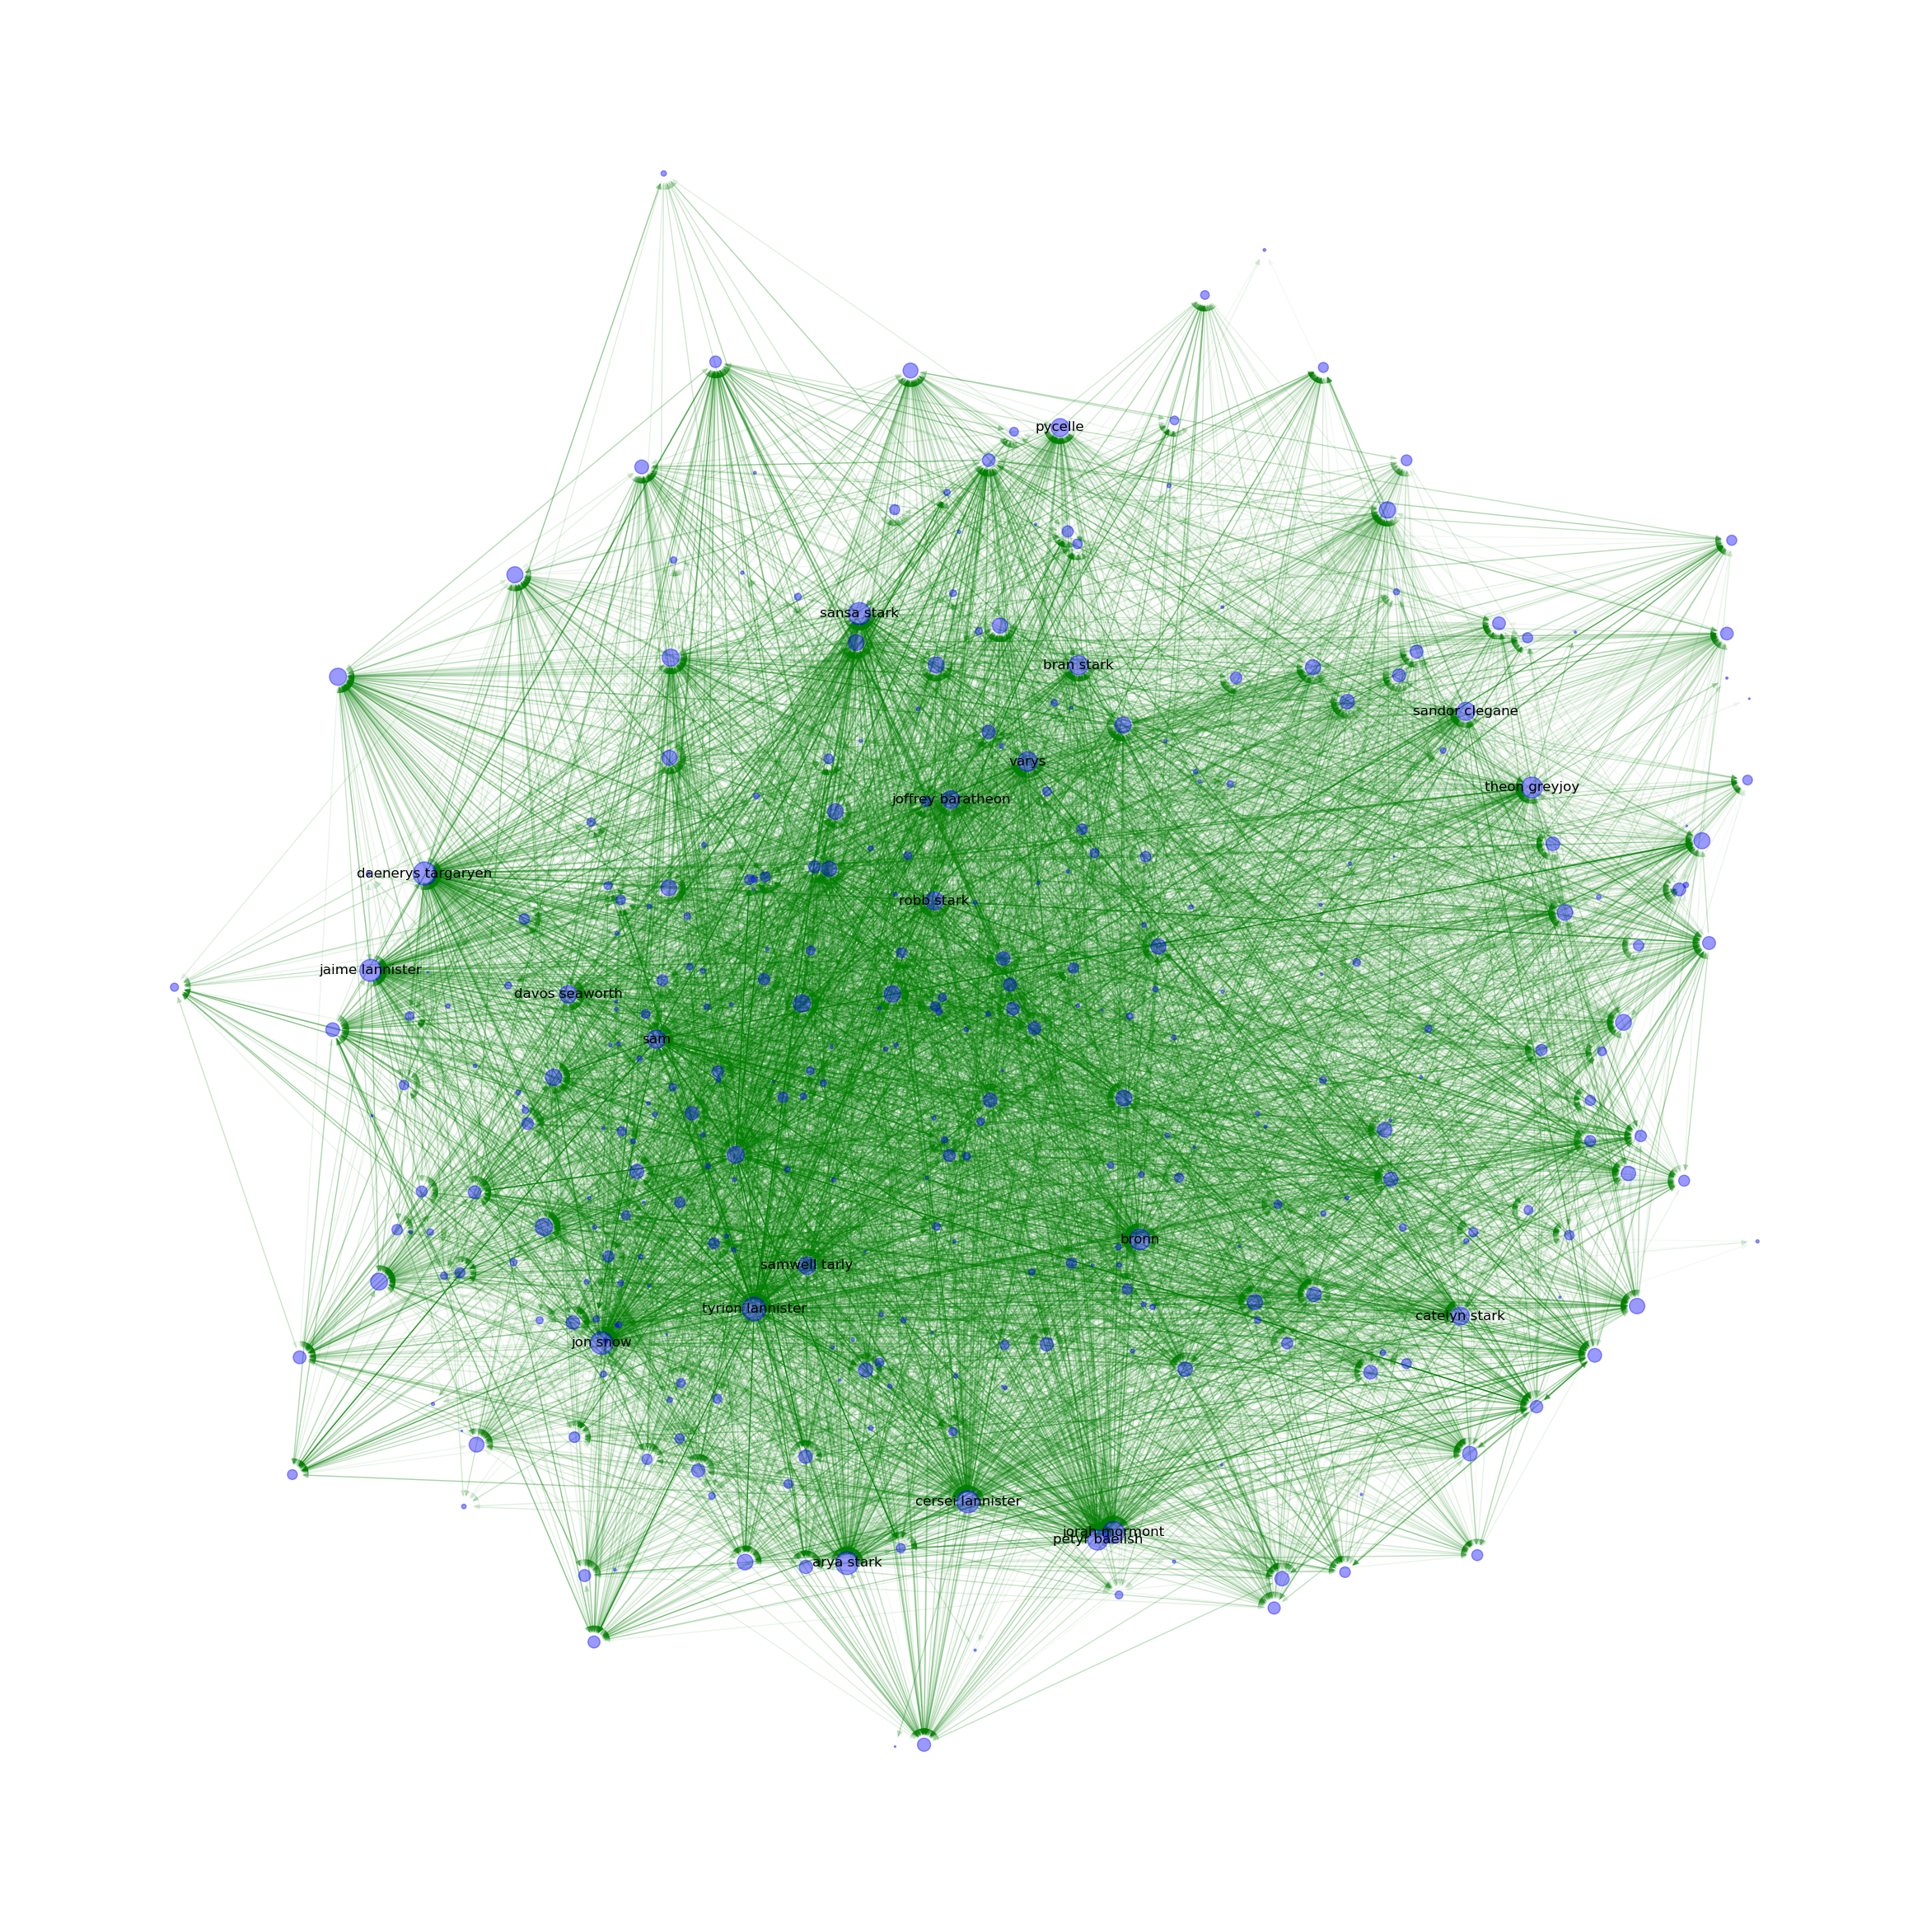

In [44]:
plt.figure(figsize=(30,30))
nx.draw_networkx_nodes(G, positions, node_size=DegreeList, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=edgeweights)
nx.draw_networkx_labels(G, positions, labels=labels)
plt.axis('off')
plt.show()

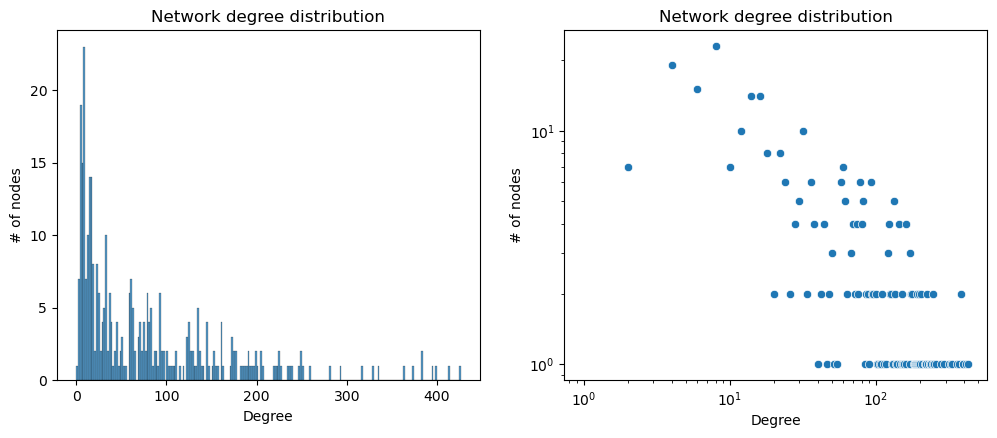

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
degree_sequence = sorted((d for n, d in G.degree()), reverse =True)

INbins = np.arange(min(degree_sequence), max(degree_sequence)+1)

pmf = [(degree_sequence == bin).sum() for bin in INbins]
pmf = np.array(pmf)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.histplot(degree_sequence,binwidth = 2)
plt.title("Network degree distribution")
plt.ylabel("# of nodes")
plt.xlabel("Degree")


plt.subplot(222)
sns.scatterplot(y = pmf, x = INbins)
plt.title("Network degree distribution")
plt.ylabel("# of nodes")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Degree")

plt.show()

In [54]:
ppp=nx.all_pairs_dijkstra_path_length(G)
longestShortest = 0
for i in ppp:
  node=max(i[1], key=i[1].get)
  if len(nx.shortest_path(G,i[0],node)) > longestShortest:
    longestShortest = len(nx.shortest_path(G,i[0],node))

print(longestShortest)

5


In [58]:
for g in G.edges(data=True):
    print(g)
    break


('qotho', 'syrio forel', {'lines': ['  Does the horse mate with the lamb?', '  The Khal needs no help from slaves who lie with sheep.', '  A witch. And spits on the ground.', "  Too many words. A witch's words poison the ears."], 'weight': 4, 'seasonNr': 1, 'episodeTitle': 'the pointy end'})


In [ ]:
SEASON1NODES =[]

(FROM, TO, {'season1':{'episode1': [' Does the horse mate with the lamb?', '  The Khal needs no help from slaves who lie with sheep.', '  A witch. And spits on the ground.', "  Too many words. A witch's words poison the ears."]}, 'weight': 4})